# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions for reconstruction, clustering, etc., should be written from scratch.

12. Change the name of the file with your roll no.



In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 5: Life in Lower Dimensions

You are provided with a dataset of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA, and perform K-means clustering the images in this reduced space.
 




In [ ]:
# Cell type : CodeWrite
# write the function for PCA and K-means clustering here. 


def PCA(X):
  X_mean = X - np.mean(X,axis=0)
  # X_mean = X_mean/np.std(X_mean,axis=0)
  # X_mean = np.nan_to_num(X_mean)


  covariance_matrix = np.cov(X_mean,rowvar = False)

  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

  sort_indices = np.argsort(eigenvalues)[::-1]
  sort_eigenvalues = eigenvalues[sort_indices]
  sort_eigenvectors = eigenvectors[:,sort_indices]

  return sort_eigenvalues,sort_eigenvectors




def K_means(X,no_cluster):
  cluster_centres = X[:no_cluster,:]
  
  def find_distance(point1,point2):
    dist = np.linalg.norm(point1 - point2)
    return dist

  def find_closest_cluster(cluster_centres,data_points):
    cluster_allocation = np.zeros(X.shape[0],dtype="int")
    count = 0
    for data_point in data_points:
      min_dist = np.inf
      min_index = 0
      for index in range(cluster_centres.shape[0]):
        dist = find_distance(cluster_centres[index],data_point)
        if dist < min_dist :
          min_dist = dist
          min_index = index
      cluster_allocation[count]= min_index
      count += 1
    return cluster_allocation
  
  def update_cluster_centres(cluster_allocation,data_points):
    sum_array = np.zeros((no_cluster,X.shape[1]))
    count_array = np.zeros(no_cluster)

    
    for index in range(cluster_allocation.size):
      cluster = cluster_allocation[index]
      sum_array[cluster] = sum_array[cluster]+data_points[index]
      count_array[cluster] += 1
    
    for index in range(no_cluster):
      sum_array[index] = sum_array[index]/count_array[index]

    return sum_array      
  
  while(1):
    cluster_allocations = find_closest_cluster(cluster_centres,X)
    cluster_centres_new = update_cluster_centres(cluster_allocations,X)
    if(np.array_equal(cluster_centres_new,cluster_centres)):
      break
    else:
      cluster_centres = cluster_centres_new
  
  objective_distance_error = 0
  for index in range(cluster_allocations.size):
    dist = find_distance(X[index],cluster_centres[cluster_allocations[index]])
    objective_distance_error += dist * dist
  
  return cluster_allocations,objective_distance_error
  






**Cell type : TextRead**

# Problem 5

#### 5a) Run PCA algorithm on the given data-set. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.




For maintaining 90% variance we need to take 21 dimensions


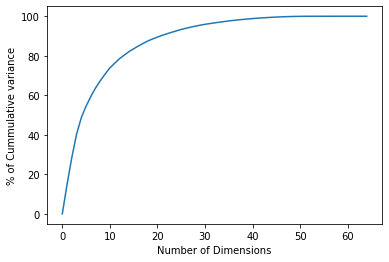

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the PCA algorithm, and plotting. 
# (Use the functions written previously.)

file = np.load("/content/Data.npz")
np.seterr(divide='ignore', invalid='ignore')

eva,eve = PCA(file['arr_0.npy'])
total = np.sum(eva)
eva = eva/total


x = np.linspace(1,file['arr_0.npy'].shape[1],num=file['arr_0.npy'].shape[1])

sum_array = np.zeros(eva.size + 1)
for index in range(1,eva.size+1):
  sum_array[index] = sum_array[index-1] + eva[index-1]
eigen_count = np.linspace(0,eva.size,eva.size+1)
plt.plot(eigen_count,sum_array*100)
plt.xlabel("Number of Dimensions")
plt.ylabel("% of Cummulative variance")
plt.show

sum = 0
index = 0
while sum <= 0.9 :
  sum += eva[index]
  index += 1

print("For maintaining 90%% variance we need to take %d dimensions"%index)



####5b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.



In [ ]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.

dimension_array = np.array([2,3,4,5,6,8,12,16,24,32,40,50])

def MSE_error(eigenvalues,eigenvectors,X,dimension):
  X_mean = X - np.mean(X,axis=0)
  # X_mean = X_mean/np.std(X_mean,axis=0)
  # X_mean = np.nan_to_num(X_mean)


  eigenvector_subset = eigenvectors[:,0:dimension]   
  X_reduced = np.dot(eigenvector_subset.transpose() , X_mean.transpose() ).transpose()

  X_reproduced = np.dot(X_reduced,eigenvector_subset.transpose())

  def find_distance(point1,point2):
    dist = np.linalg.norm(point1 - point2)
    return dist

  MSE = 0
  for index in range(X_mean.shape[0]):
    dist = find_distance(X_mean[index],X_reproduced[index])
    MSE += dist*dist
  MSE = MSE/X.shape[0]

  return X_reduced,MSE

print("Dimension : MSE")
for dimension in dimension_array:
  X_reduced,MSE = MSE_error(eva,eve,file['arr_0.npy'],dimension)
  print(dimension,end=" : ")
  print(MSE)

X_reduced,MSE = MSE_error(eva,eve,file['arr_0.npy'],16)


Dimension : MSE
2 : 858.9447808487348
3 : 717.2352446162687
4 : 616.1911300562691
5 : 546.7166473621047
6 : 487.6410153666709
8 : 391.79473611497616
12 : 258.70583438481384
16 : 180.9397032573787
24 : 88.82087637084612
32 : 40.42470493509364
40 : 14.174164665139777
50 : 0.5441328712389208


####5c) Apply K-means clustering on the reduced dataset from last subpart (b) (i.e., the $R^{64}$ to $R^\hat{d}$ reduced dataset; pick the initial k points as cluster centers during initialization). Report the optimal choice of K you have made from the set [1...15]. Which method did you choose to find the optimum number of clusters? And explain briefy why you chose that method. Also, show the 2D scatter plot (consider only the first two dimensions of optimal $\hat{d}$) of the datapoints based on the cluster predicted by K-means (use different color for each cluster).


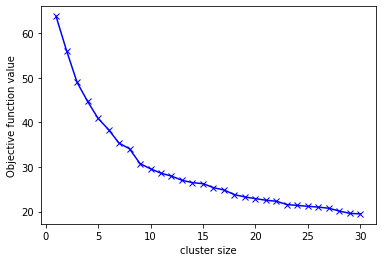

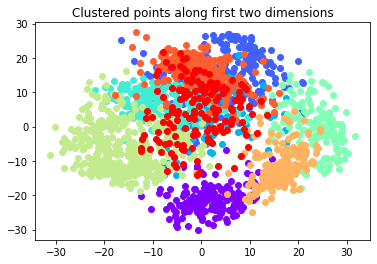

In [ ]:
# Cell type : CodeWrite
# Write the code for dimensionality reduction, run k-means algorithm on the reduced data-set and do plotting.

no_cluster = np.linspace(1,30,num=30)
error_matrix = np.zeros(no_cluster.size)
index = 0
for cluster in no_cluster:
  #print(cluster)
  cluster_allocation,Error = K_means(X_reduced,int(cluster))
  error_matrix[index] = Error/(X_reduced.size)
  index += 1
  #print(Error/(X_reduced.size))

plt.plot(no_cluster,error_matrix,'bx-')
plt.xlabel(r'cluster size')
plt.ylabel(r'Objective function value')
plt.show()

cluster_allocation,Error = K_means(X_reduced,9)

color=plt.cm.rainbow(np.linspace(0,1,9))
for i,c in zip(range(9),color):
  indices = np.argwhere(cluster_allocation == i)
  indices = indices.flatten()
  X = np.zeros(indices.size)
  Y = np.zeros(indices.size)
  count = 0
  for index in indices:
    X[count] = X_reduced[index][0]
    Y[count] = X_reduced[index][1]
    count += 1
  plt.scatter(X,Y,color=c)
plt.title("Clustered points along first two dimensions")
plt.show()



####5d) In the next TextWrite cell, Summarise and explain your observations from the above experiments. Is the PCA+K-means clustering consistent with how your brain would cluster the images?



**Cell type : TextWrite**

Report your observations, MSE values and the method used to choose the optimal number of clusters.

As we increase the number of dimensions in PCA, less will be the error between the original and reconstructed data. Thus, we have a trade off between memory space and error in reduced data.

While for K-means, increasing cluster size will also decrease the value of the objective function, however the decrease is rapid at first, and it flattens out eventually. Thus, we choose the cluster size where the biggest change in slope is observed.

Now, when we look at images, we mainly observe the features that have a big contribution towards the overall structure of the image. They represent the features with a big eigenvalues in our PCA. Then for clustering, we observe the above features and cluster images based on how close the features lie. This represents our K-means algorithm where we cluster our images based on the features selected from the PCA step.
Thus, the overall PCA + K-means is very similar to how our brain would cluster the images.
